# Shampoo Sales Prediction using Time Series ARIMA Model

In [141]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

C:\Users\Vignesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [142]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True,index_col='Month')

In [143]:
df.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [144]:
df.describe()

,Sales of shampoo over a three year period
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1-01 to Sales of shampoo over a three year period
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1)
memory usage: 592.0+ bytes


In [146]:
df.isnull().values.any()

True

In [147]:
df.shape

(37, 1)

In [148]:
df.dropna(inplace=True)

In [149]:
df.shape

(36, 1)

<AxesSubplot:xlabel='Month'>

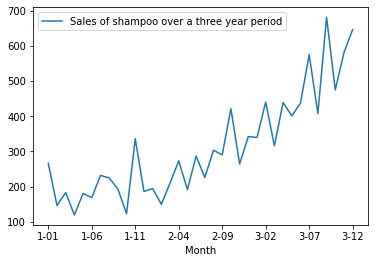

In [150]:
df.plot()

C:\Users\Vignesh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


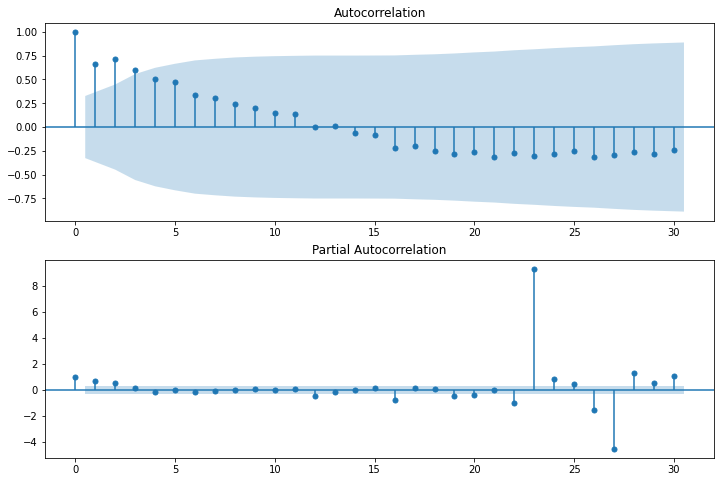

In [151]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=30, ax=ax2)

In [152]:

X = df.values
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [153]:
train, test = X[0:size], X[size:len(X)]

In [154]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test,predictions)
print('Test MSE:',error)

predicted=272.964481, expected=421.600000
predicted=290.313952, expected=264.500000
predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
Test MSE: 7547.807568293882


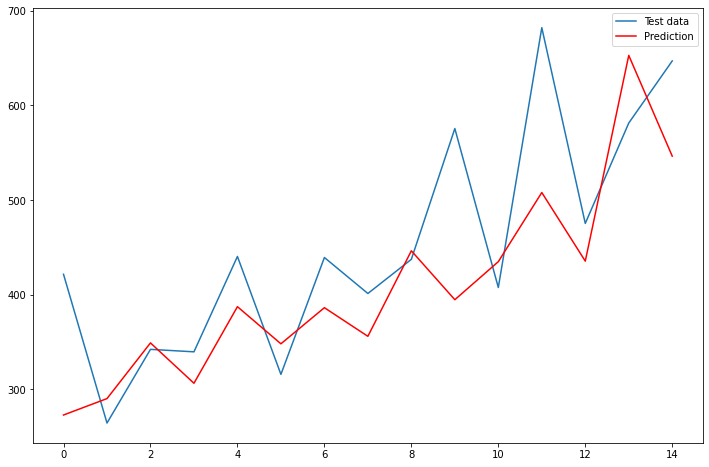

In [155]:
plt.figure(figsize=(12,8))
plt.plot(test,label='Test data')
plt.plot(predictions, color='red',label='Prediction')
plt.legend()
plt.show()